# Lib and dataset import

In [1]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 43.2 MB/s 
     |████████████████████████████████| 6.5 MB 3.4 MB/s 
     |████████████████████████████████| 596 kB 34.5 MB/s 
     |████████████████████████████████| 67 kB 2.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Import TreeTagger

In [2]:
%%bash
cd '/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/treetagger'
# Download the tagger package for your system (PC-Linux, Mac OS-X, ARM64, ARMHF, ARM-Android, PPC64le-Linux).
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
tar -xzvf tree-tagger-linux-3.2.4.tar.gz
# Download the tagging scripts into the same directory.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tagger-scripts.tar.gz
gunzip tagger-scripts.tar.gz
# Download the installation script install-tagger.sh.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/install-tagger.sh
# Download the parameter files for the languages you want to process.
# list of all files (parameter files) https://cis.lmu.de/~schmid/tools/TreeTagger/#parfiles
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/english.par.gz

wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/french.par.gz

sh install-tagger.sh
cd ..
sudo pip install --upgrade treetaggerwrapper

bin/
bin/train-tree-tagger
bin/separate-punctuation
bin/tree-tagger
bin/tree-tagger-flush
cmd/
cmd/lookup.perl
COPYRIGHT
doc/
doc/sigdat95.pdf
doc/nemlap94.pdf
FILES
README
Release-Notes

TreeTagger version for PC-Linux installed.
Tagging scripts installed.
English parameter file installed.
French parameter file installed.
Tagging scripts installed.
Path variables modified in tagging scripts.

You might want to add /content/drive/MyDrive/Colab Notebooks/ressources/la beubli/treetagger/cmd and /content/drive/MyDrive/Colab Notebooks/ressources/la beubli/treetagger/bin to the PATH variable so that you do not need to specify the full path to run the tagging scripts.

  Created wheel for treetaggerwrapper: filename=treetaggerwrapper-2.3-py3-none-any.whl size=40772 sha256=430cd08db74e48b9ec9335ea630ae6aede5f268080403c491d55d3afc5a3c961
  Stored in directory: /root/.cache/pip/wheels/a0/93/50/47079639c52033b2e2b865a59654eea6832068149414cb78a5
Successfully built treetaggerwrapper


--2022-03-22 23:50:20--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1889240 (1.8M) [application/x-gzip]
Saving to: ‘tree-tagger-linux-3.2.4.tar.gz.20’

     0K .......... .......... .......... .......... ..........  2%  223K 8s
    50K .......... .......... .......... .......... ..........  5%  442K 6s
   100K .......... .......... .......... .......... ..........  8% 31.9M 4s
   150K .......... .......... .......... .......... .......... 10% 28.0M 3s
   200K .......... .......... .......... .......... .......... 13%  448K 3s
   250K .......... .......... .......... .......... .......... 16% 31.9M 2s
   300K .......... .......... .......... .......... .......... 18% 33.1M 2s
   350K .......... .......... .......... .......... .......... 21% 27.1M 2s
   40

In [3]:
#load libs
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
import re
import pprint   # For proper print of sequences.
import treetaggerwrapper
from nltk.tokenize import sent_tokenize 
import glob
from tqdm.notebook import tqdm
tqdm.pandas()

In [4]:
sentence_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/sentence_dataset/complete_translation.csv', index_col=0)

In [5]:
sentence_dataset

,chapter_number,page_number,line_number,sentence_number,sentence,en_translation
0,1.0,1.0,1,0,"Au commencement, Dieu créa les cieux et la terre.",In the beginning God created the heavens and t...
1,1.0,1.0,2,0,La terre était informe et vide: il y avait des...,The earth was informed and empty: there was da...
2,1.0,1.0,3,0,Dieu dit: Que la lumière soit!,"God said, Let the light be!"
3,1.0,1.0,3,1,Et la lumière fut.,And the light was.
4,1.0,1.0,4,0,Dieu vit que la lumière était bonne; et Dieu s...,God saw that the light was good; and God separ...
...,...,...,...,...,...,...
40855,66.0,22.0,19,0,et si quelqu'un retranche quelque chose des pa...,And if any man cut off anything from the words...
40856,66.0,22.0,20,0,"Celui qui atteste ces choses dit: Oui, je vien...","He who attests to these things said, ""Yes, I a..."
40857,66.0,22.0,20,1,Amen!,Amen!
40858,66.0,22.0,20,2,"Viens, Seigneur Jésus!","Come, Lord Jesus!"


# Parse features function

In [6]:
test_sentence = "Ainsi, il y eut un soir, et il y eut un matin: ce fut le jour de Jonas."

def parse_sentence_features(input_sentence):
  features = []
  features.append('test')



  return features


parse_sentence_features(test_sentence)

['test']

# Apply feature extraction

In [7]:
!pip install flair

     |████████████████████████████████| 322 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 47.8 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 981 kB 33.6 MB/s 
     |████████████████████████████████| 19.7 MB 2.1 MB/s 
     |████████████████████████████████| 788 kB 11.3 MB/s 
     |████████████████████████████████| 48 kB 4.6 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=8178366d90a8718ec1c28bd976781651cd2222646e35b2cd78774e91a635545a
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=c6dba81d0cc82ffeb93cc175

In [8]:
from flair.data import Sentence
from flair.models import SequenceTagger
from flair.models import MultiTagger


# load tagger
# tagger = SequenceTagger.load("flair/upos-multi-fast")

# tagger = MultiTagger.load(['flair/upos-multi-fast', 'flair/ner-french'])
tagger = MultiTagger.load(['flair/ner-multi-fast'])

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

2022-03-22 23:53:09,739 loading file /root/.flair/models/ner-multi-fast/d0ca1daace2b097b04a886b4be80d82634229555eb2da7079b1b102579fd3835.7b305379b36567738bc455e399f4a4b341d8db8edabffc6807a0ff9cc4efb933


# Extract NER from complete original

## function definition and small extract

In [9]:
def get_tagged_sentence(input_sentence, tagger):

  sentence = Sentence(input_sentence)
  tagger.predict(sentence)
  ner_text = ''
  ner_label =''

  for span in sentence.get_spans():
    # print(span.get_labels())
    ner_text = ner_text +','+ span.id_text
    ner_label = ner_label +','+ str(span.get_labels()[0])

  return {'ner_text':ner_text[1:], 'ner_label':ner_label[1:]}


In [10]:
small_sample = sentence_dataset[38:43]

In [11]:
# small_sample['ner_french'] = 
small_sample[['ner_text', 'ner_label']] = small_sample.progress_apply(lambda row: get_tagged_sentence(row['sentence'], tagger), axis=1, result_type='expand')
small_sample

  0%|          | 0/5 [00:00<?, ?it/s]

,chapter_number,page_number,line_number,sentence_number,sentence,en_translation,ner_text,ner_label
38,1.0,1.0,26,0,"Puis Dieu dit: Faisons l'homme à notre image, ...","And God said, Let us make man in our image, ac...",,
39,1.0,1.0,27,0,"Dieu créa l'homme à son image, il le créa à l'...","God created man in his image, he created him i...",Dieu (14),PER (0.3378)
40,1.0,1.0,28,0,"Dieu les bénit, et Dieu leur dit: Soyez fécond...","And God blessed them, and God said unto them, ...",,
41,1.0,1.0,29,0,"Et Dieu dit: Voici, je vous donne toute herbe ...","And God said, Behold, I give you every herb be...",,
42,1.0,1.0,30,0,"Et à tout animal de la terre, à tout oiseau du...","And to every animal of the earth, to every bir...",,


## Parse whole dataset

In [12]:
import flair, torch
device = torch.device('cuda:0')

In [13]:
sentence_dataset[['ner_text', 'ner_label']] = sentence_dataset.progress_apply(lambda row: get_tagged_sentence(row['sentence'], tagger), axis=1, result_type='expand')

  0%|          | 0/40860 [00:00<?, ?it/s]

## Add some metadata

In [14]:
sentence_dataset['loc_count'] = sentence_dataset.ner_label.str.count('LOC')
sentence_dataset['per_count'] = sentence_dataset.ner_label.str.count('PER')
sentence_dataset['misc_count'] = sentence_dataset.ner_label.str.count('MISC')
sentence_dataset

,chapter_number,page_number,line_number,sentence_number,sentence,en_translation,ner_text,ner_label,loc_count,per_count,misc_count
0,1.0,1.0,1,0,"Au commencement, Dieu créa les cieux et la terre.",In the beginning God created the heavens and t...,,,0,0,0
1,1.0,1.0,2,0,La terre était informe et vide: il y avait des...,The earth was informed and empty: there was da...,,,0,0,0
2,1.0,1.0,3,0,Dieu dit: Que la lumière soit!,"God said, Let the light be!",,,0,0,0
3,1.0,1.0,3,1,Et la lumière fut.,And the light was.,,,0,0,0
4,1.0,1.0,4,0,Dieu vit que la lumière était bonne; et Dieu s...,God saw that the light was good; and God separ...,,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
40855,66.0,22.0,19,0,et si quelqu'un retranche quelque chose des pa...,And if any man cut off anything from the words...,,,0,0,0
40856,66.0,22.0,20,0,"Celui qui atteste ces choses dit: Oui, je vien...","He who attests to these things said, ""Yes, I a...",,,0,0,0
40857,66.0,22.0,20,1,Amen!,Amen!,,,0,0,0
40858,66.0,22.0,20,2,"Viens, Seigneur Jésus!","Come, Lord Jesus!","Seigneur Jésus (3,4)",MISC (0.865),0,0,1


We can see that the NER tags are not very precise: some locations are people, and some people are locations. Not in a simple way: the same person name will either be a location, or a person, depending on the sentence.

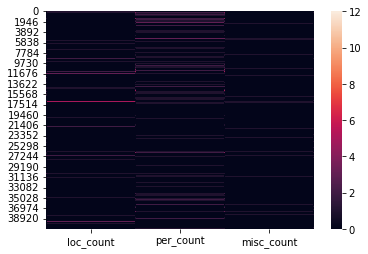

In [15]:
sns.heatmap(data=sentence_dataset[['loc_count', 'per_count', 'misc_count']])

## Export to csv

In [17]:
sentence_dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/sentence_dataset/translation_plus_ner_extraction.csv')

# Load CSV and continue

In [19]:
sentence_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/sentence_dataset/translation_plus_ner_extraction.csv', index_col=0)

# Parse PRO:PERS

In [25]:
from flair.data import Sentence
from flair.models import SequenceTagger
from flair.models import MultiTagger

tagger_pos = MultiTagger.load(['pos-multi-fast'])

2022-03-23 00:27:46,497 --------------------------------------------------------------------------------
2022-03-23 00:27:46,505 The model key 'pos-multi-fast' now maps to 'https://huggingface.co/flair/upos-multi-fast' on the HuggingFace ModelHub
2022-03-23 00:27:46,510  - The most current version of the model is automatically downloaded from there.
2022-03-23 00:27:46,514  - (you can alternatively manually download the original model at https://nlp.informatik.hu-berlin.de/resources/models/multi-pos-fast/pos-multi-fast.pt)
2022-03-23 00:27:46,519 --------------------------------------------------------------------------------
2022-03-23 00:27:46,681 loading file /root/.flair/models/upos-multi-fast/db3a6189888a201a507dd9cae73ef157bf3e8d27cf0c5b6c96e9a175a77d70e3.83bafee89d19e198771b16525069a2df5e0a8cc35c23298f7844c7a636eadc13


In [28]:


sentence = Sentence(test_sentence)
tagger_pos.predict(sentence)
# ner_text = ''
# ner_label =''
sentence.get_spans()

[<ADV-span (1): "Ainsi">,
 <PUNCT-span (2): ",">,
 <PRON-span (3): "il">,
 <PRON-span (4): "y">,
 <VERB-span (5): "eut">,
 <DET-span (6): "un">,
 <NOUN-span (7): "soir">,
 <PUNCT-span (8): ",">,
 <CCONJ-span (9): "et">,
 <PRON-span (10): "il">,
 <PRON-span (11): "y">,
 <VERB-span (12): "eut">,
 <DET-span (13): "un">,
 <NOUN-span (14): "matin">,
 <PUNCT-span (15): ":">,
 <PRON-span (16): "ce">,
 <AUX-span (17): "fut">,
 <DET-span (18): "le">,
 <NOUN-span (19): "jour">,
 <ADP-span (20): "de">,
 <PROPN-span (21): "Jonas">,
 <PUNCT-span (22): ".">]

In [68]:
small_sample = sentence_dataset[90:100]

In [81]:
def get_pos_tagged_sentence(input_sentence, tagger):

  sentence = Sentence(input_sentence)
  tagger.predict(sentence)
  ner_text = ''
  ner_label = ''
  il_count = 0
  other_pron_count = 0

  for span in sentence.get_spans():

    ner_label = str(span.get_labels()[0])
    ner_label = ner_label.split(' ')[0]

    if (ner_label == 'PRON'):
      ner_text = span.id_text.lower()
      ner_text = ner_text.split(' ')[0]
      # print(ner_text)
      # print((ner_label))

      # "il" can be neutral or masc
      if (ner_text == 'il'):
        il_count = il_count + 1
      # other gendered pro:per cases 
      elif (ner_text == 'ils'):
        other_pron_count = other_pron_count + 1
      elif (ner_text == 'elle'):
        other_pron_count = other_pron_count + 1
      elif (ner_text == 'elles'):
        other_pron_count = other_pron_count + 1
      # else
      # do nothing

  return {'il_count' : il_count, 'other_pron_count' : other_pron_count}


In [83]:
small_sample[['il_count', 'other_pron_count']] = small_sample.progress_apply(lambda row: get_pos_tagged_sentence(row['sentence'], tagger_pos), axis=1, result_type='expand')
small_sample

  0%|          | 0/10 [00:00<?, ?it/s]

,chapter_number,page_number,line_number,sentence_number,sentence,en_translation,ner_text,ner_label,loc_count,per_count,misc_count,il_count,other_pron_count
90,1.0,3.0,14,0,L'Eternel Dieu dit au serpent: Puisque tu as f...,"And the LORD God said unto the serpent, Since ...",NaN,NaN,0,0,0,0,0
91,1.0,3.0,15,0,"Je mettrai inimitié entre toi et la femme, ent...","I will put enmity between you and the woman, b...",NaN,NaN,0,0,0,0,0
92,1.0,3.0,16,0,Il dit à la femme: J'augmenterai la souffrance...,"He said to the woman, ""I will increase the suf...",NaN,NaN,0,0,0,2,0
93,1.0,3.0,17,0,Il dit à l'homme: Puisque tu as écouté la voix...,"And he said unto the man, Since thou hast hear...",NaN,NaN,0,0,0,1,0
94,1.0,3.0,17,1,le sol sera maudit à cause de toi.,The ground will be cursed because of you.,NaN,NaN,0,0,0,0,0
95,1.0,3.0,17,2,C'est à force de peine que tu en tireras ta no...,It's hard for you to get your food out of it e...,NaN,NaN,0,0,0,0,0
96,1.0,3.0,18,0,"il te produira des épines et des ronces, et tu...","He will produce thorns and thorns for you, and...",NaN,NaN,0,0,0,1,0
97,1.0,3.0,19,0,C'est à la sueur de ton visage que tu mangeras...,It is with the sweat of your face that you wil...,NaN,NaN,0,0,0,0,0
98,1.0,3.0,20,0,Adam donna à sa femme le nom d'Eve: car elle a...,Adam called his wife Eve: for she was the moth...,Adam (1),PER (0.8346),0,1,0,0,1
99,1.0,3.0,21,0,L'Eternel Dieu fit à Adam et à sa femme des ha...,And the LORD God made garments of skin to Adam...,Adam (5),PER (0.3761),0,1,0,1,0


## Apply on the complete dataset

In [84]:
sentence_dataset[['il_count', 'other_pron_count']] = sentence_dataset.progress_apply(lambda row: get_pos_tagged_sentence(row['sentence'], tagger_pos), axis=1, result_type='expand')
sentence_dataset

  0%|          | 0/40860 [00:00<?, ?it/s]

,chapter_number,page_number,line_number,sentence_number,sentence,en_translation,ner_text,ner_label,loc_count,per_count,misc_count,il_count,other_pron_count
0,1.0,1.0,1,0,"Au commencement, Dieu créa les cieux et la terre.",In the beginning God created the heavens and t...,,,0,0,0,0,0
1,1.0,1.0,2,0,La terre était informe et vide: il y avait des...,The earth was informed and empty: there was da...,,,0,0,0,1,0
2,1.0,1.0,3,0,Dieu dit: Que la lumière soit!,"God said, Let the light be!",,,0,0,0,0,0
3,1.0,1.0,3,1,Et la lumière fut.,And the light was.,,,0,0,0,0,0
4,1.0,1.0,4,0,Dieu vit que la lumière était bonne; et Dieu s...,God saw that the light was good; and God separ...,,,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40855,66.0,22.0,19,0,et si quelqu'un retranche quelque chose des pa...,And if any man cut off anything from the words...,NaN,NaN,0,0,0,0,0
40856,66.0,22.0,20,0,"Celui qui atteste ces choses dit: Oui, je vien...","He who attests to these things said, ""Yes, I a...",NaN,NaN,0,0,0,0,0
40857,66.0,22.0,20,1,Amen!,Amen!,NaN,NaN,0,0,0,0,0
40858,66.0,22.0,20,2,"Viens, Seigneur Jésus!","Come, Lord Jesus!","Seigneur Jésus (3,4)",MISC (0.865),0,0,1,0,0


In [85]:
sentence_dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/sentence_dataset/translation_plus_ner_plus_pro_per_extraction.csv')

## English version

In [89]:
en_test_sentence = "So there was evening, and there was morning: it was the second day.	"

In [115]:
sentence = Sentence(en_test_sentence)
tagger_pos.predict(sentence)
sentence.get_spans()
for span in sentence.get_spans():

    # ner_label = span.get_labels()
    ner_label = str(span.get_labels()[0])
    ner_label = ner_label.split(' ')[0]

    ner_text = span.id_text.lower()
    ner_text = ner_text.split(' ')[0]

    # print(ner_text)
    print(ner_label)
    # break

ADV
PRON
VERB
NOUN
PUNCT
CCONJ
PRON
VERB
NOUN
PUNCT
PRON
AUX
DET
ADJ
NOUN
PUNCT


In [129]:
def get_pos_tagged_sentence_en(input_sentence, tagger):

  sentence = Sentence(input_sentence)
  tagger.predict(sentence)
  ner_text = ''
  ner_label = ''
  he_count = 0
  there_count = 0
  she_it_them_count = 0

  for span in sentence.get_spans():

    ner_label = str(span.get_labels()[0])
    ner_label = ner_label.split(' ')[0]

    if (ner_label == 'PRON'):
      # print(ner_text)
      # print((ner_label))
      ner_text = span.id_text.lower()
      ner_text = ner_text.split(' ')[0]

      # "il" can be neutral or masc
      if (ner_text == 'he'):
        he_count = he_count + 1
      # other gendered pro:per cases 
      elif (ner_text == 'there'):
        there_count = there_count + 1
      elif ((ner_text == 'she') or (ner_text == 'it') or (ner_text == 'them')):
        she_it_them_count = she_it_them_count + 1
      # else
      # do nothing

  return {'he_count' : he_count,'there_count' : there_count, 'she_it_them_count' : she_it_them_count}

In [132]:
small_sample = sentence_dataset[0:100]

In [133]:
small_sample[['he_count','there_count', 'she_it_them_count']] = small_sample.progress_apply(lambda row: get_pos_tagged_sentence_en(row['en_translation'], tagger_pos), axis=1, result_type='expand')
small_sample

  0%|          | 0/100 [00:00<?, ?it/s]

,chapter_number,page_number,line_number,sentence_number,sentence,en_translation,ner_text,ner_label,loc_count,per_count,misc_count,il_count,other_pron_count,he_count,there_count,she_it_them_count
0,1.0,1.0,1,0,"Au commencement, Dieu créa les cieux et la terre.",In the beginning God created the heavens and t...,,,0,0,0,0,0,0,0,0
1,1.0,1.0,2,0,La terre était informe et vide: il y avait des...,The earth was informed and empty: there was da...,,,0,0,0,1,0,0,1,0
2,1.0,1.0,3,0,Dieu dit: Que la lumière soit!,"God said, Let the light be!",,,0,0,0,0,0,0,0,0
3,1.0,1.0,3,1,Et la lumière fut.,And the light was.,,,0,0,0,0,0,0,0,0
4,1.0,1.0,4,0,Dieu vit que la lumière était bonne; et Dieu s...,God saw that the light was good; and God separ...,,,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,3.0,17,2,C'est à force de peine que tu en tireras ta no...,It's hard for you to get your food out of it e...,NaN,NaN,0,0,0,0,0,0,0,2
96,1.0,3.0,18,0,"il te produira des épines et des ronces, et tu...","He will produce thorns and thorns for you, and...",NaN,NaN,0,0,0,1,0,1,0,0
97,1.0,3.0,19,0,C'est à la sueur de ton visage que tu mangeras...,It is with the sweat of your face that you wil...,NaN,NaN,0,0,0,0,0,0,0,1
98,1.0,3.0,20,0,Adam donna à sa femme le nom d'Eve: car elle a...,Adam called his wife Eve: for she was the moth...,Adam (1),PER (0.8346),0,1,0,0,1,0,0,1


In [134]:
sentence_dataset[['he_count','there_count', 'she_it_them_count']] = sentence_dataset.progress_apply(lambda row: get_pos_tagged_sentence_en(row['en_translation'], tagger_pos), axis=1, result_type='expand')

  0%|          | 0/40860 [00:00<?, ?it/s]

## Export to csv

In [135]:
sentence_dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/sentence_dataset/translation_plus_ner_plus_pro_per__plus_en_extraction.csv')